In [295]:
import numpy as np
import histlite as hl
import tables
import matplotlib.pyplot as plt

In [296]:
dpsi, energy = np.load('/home/ssclafani/pone/data/dpsi_vs_energy_Nugen.npy')

In [297]:
f = tables.open_file('/home/ssclafani/pone/data/Nugen_70_Reco.hdf5')

In [298]:
nfiles = 1000
nevents = 100

In [299]:
event = f.root.I3EventHeader.cols.Event[:]
true_zenith = f.root.NuGPrimary.cols.zenith[:]
true_azimuth = f.root.NuGPrimary.cols.azimuth[:]
true_energy = f.root.NuGPrimary.cols.energy[:]
oneweight = f.root.I3MCWeightDict.cols.OneWeight[:]
ow = oneweight / (nfiles * nevents)
w_astro = 1e-18 *ow *(true_energy/1e5)**-2
#w_astro = 1e-18 *ow *(true_energy/1e5)**-2
w_atmo = 1e-18 *ow *(true_energy/1e5)**-3.7

In [300]:
#dpsi = np.deg2rad(.05) + (dpsi*1.05)

In [301]:
w_astro = w_astro[dpsi > 0]
energy = energy[dpsi > 0]
dpsi = dpsi[dpsi > 0]

In [302]:
delta_psi = 2

In [303]:
dpsi_bins = np.linspace(0, delta_psi**2, delta_psi**2 * 25 + 1)

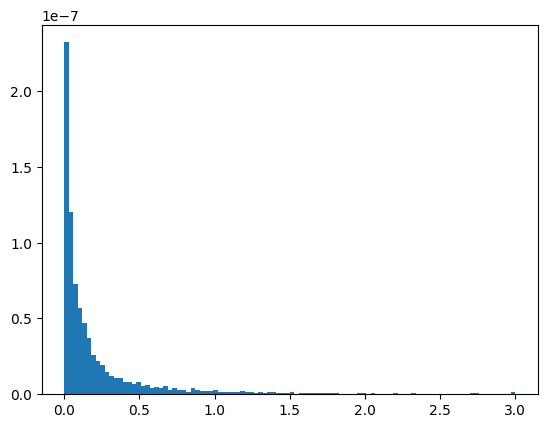

In [304]:
plt.hist(np.degrees(dpsi), weights=w_astro, 
         bins=100, range=(0,3));

#plt.xlim(0,60)

In [305]:
len(dpsi_bins)

101

In [306]:
logE_reco_bins = np.arange(2, 7.02, step=0.2)

In [307]:
len(logE_reco_bins)

26

In [308]:
h = hl.hist(( np.log10(energy), 
             np.degrees(dpsi)**2), weights=w_astro,
            bins=[logE_reco_bins, dpsi_bins])
h = h.normalize(1, integrate=False)

{'colormesh': <matplotlib.collections.QuadMesh at 0x7fb7b53d07c0>,
 'colorbar': <matplotlib.colorbar.Colorbar at 0x7fb7b4cb8670>}

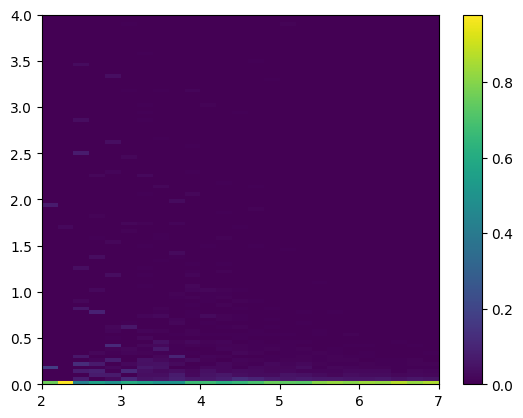

In [309]:
fig, ax = plt.subplots()
hl.plot2d(ax, h, log=False, cbar=True)
#ax.set_xlabel('logE_true')
#ax.set_ylabel('dPsi^2')

In [310]:
np.save('../data/dpsi2_vs_logenergy.npy', h)